In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
fs_df = pd.read_pickle('../data/fs_df.pkl')

In [3]:
def get_delta(row):
    days, hms = row.split('-') if '-' in row else [0, row]
    hours, minutes, seconds = hms.split(':')
    td = timedelta(days=int(days), seconds=int(seconds), minutes=int(minutes), hours=int(hours))
    return td.total_seconds() # returning total seconds because more applicable for comparisons
fs_df['REQTIME'] = fs_df['REQTIME'].apply(get_delta)
fs_df['USEDTIME'] = fs_df['USEDTIME'].apply(get_delta)

<BarContainer object of 7 artists>

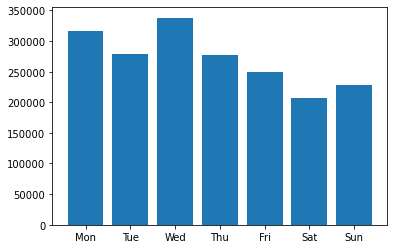

In [4]:
jobs_weekday = [len(fs_df[fs_df['BEGIN'].dt.day == x]) for x in range(1,8)]
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], jobs_weekday);

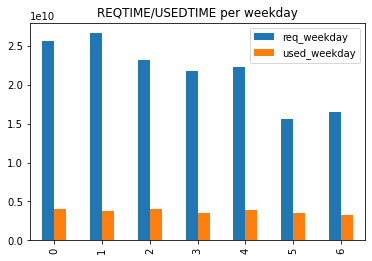

In [21]:
time_ru_df = pd.DataFrame()
time_ru_df['req_weekday'] = [fs_df[(fs_df['BEGIN'].dt.day == x)]['REQTIME'].sum() for x in range(1,8)]
time_ru_df['used_weekday'] = [fs_df[(fs_df['BEGIN'].dt.day == x)]['USEDTIME'].sum() for x in range(1,8)]
time_ru_df.plot(kind='bar', title='REQTIME/USEDTIME per weekday');

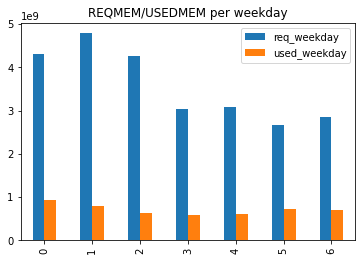

In [22]:
time_ru_df = pd.DataFrame()
time_ru_df['req_weekday'] = [fs_df[(fs_df['BEGIN'].dt.day == x)]['REQMEM'].sum() for x in range(1,8)]
time_ru_df['used_weekday'] = [fs_df[(fs_df['BEGIN'].dt.day == x)]['USEDMEM'].sum() for x in range(1,8)]
time_ru_df.plot(kind='bar', title='REQMEM/USEDMEM per weekday');

<BarContainer object of 24 artists>

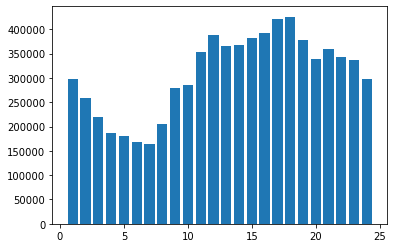

In [6]:
jobs_hour = [len(fs_df[fs_df['BEGIN'].dt.hour == x]) for x in range(0,24)]
hours = [x for x in range(1,25)]
plt.bar(hours, jobs_hour);

<AxesSubplot:>

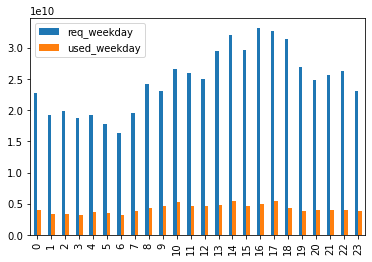

In [7]:
time_ru_df = pd.DataFrame()
time_ru_df['req_weekday'] = [fs_df[(fs_df['BEGIN'].dt.hour == x)]['REQTIME'].sum() for x in range(0,24)]
time_ru_df['used_weekday'] = [fs_df[(fs_df['BEGIN'].dt.hour == x)]['USEDTIME'].sum() for x in range(0,24)]
time_ru_df.plot(kind='bar');

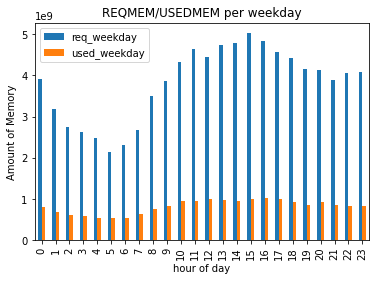

In [25]:
time_ru_df = pd.DataFrame()
time_ru_df['req_weekday'] = [fs_df[(fs_df['BEGIN'].dt.hour == x)]['REQMEM'].sum() for x in range(0,24)]
time_ru_df['used_weekday'] = [fs_df[(fs_df['BEGIN'].dt.hour == x)]['USEDMEM'].sum() for x in range(0,24)]
time_ru_df.plot(kind='bar', xlabel='hour of day', ylabel='Amount of Memory', title='REQMEM/USEDMEM per weekday');